# Step 1: Import necessary libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load the dataset

In [26]:
dataset = pd.read_csv("housing.csv")

# Step 3: Data Exploration and Preprocessing

In [27]:
# Display the first few rows of the dataset
print(dataset.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [28]:
# Check for missing values
missing_values = dataset.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [29]:
# Handle missing values (if necessary)
# For example, to remove rows with missing values:
dataset.dropna(inplace=True)

In [31]:
dataset["furnishingstatus"].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [32]:
# Convert categorical variables to numeric using one-hot encoding
dataset = pd.get_dummies(dataset, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                                           'airconditioning', 'prefarea', 'furnishingstatus'], drop_first=True)
dataset

price  area  bedrooms  bathrooms  stories  parking  mainroad_no  \
0    13300000  7420         4          2        3        2        False   
1    12250000  8960         4          4        4        3        False   
2    12250000  9960         3          2        2        2        False   
3    12215000  7500         4          2        2        3        False   
4    11410000  7420         4          1        2        2        False   
..        ...   ...       ...        ...      ...      ...          ...   
540   1820000  3000         2          1        1        2        False   
541   1767150  2400         3          1        1        0         True   
542   1750000  3620         2          1        1        0        False   
543   1750000  2910         3          1        1        0         True   
544   1750000  3850         3          1        2        0        False   

     mainroad_yes  guestroom_no  guestroom_yes  ...  basement_yes  \
0            True          True          False  ...         False   
1            True          True          False  ...         False   
2            True          True          False  ...          True   
3            True          True          False  ...          True   
4            True         False           True  ...          True   
..            ...           ...            ...  ...           ...   
540          True          True          False  ...          True   
541         False          True          False  ...         False   
542          True          True          False  ...         False   
543         False          True          False  ...         False   
544          True          True          False  ...         False   

     hotwaterheating_no  hotwaterheating_yes  airconditioning_no  \
0                  True                False               False   
1                  True                False               False   
2                  True                False                True   
3                  True                False               False   
4                  True                False               False   
..                  ...                  ...                 ...   
540                True                False                True   
541                True                False                True   
542                True                False                True   
543                True                False                True   
544                True                False                True   

     airconditioning_yes  prefarea_no  prefarea_yes  \
0                   True        False          True   
1                   True         True         False   
2                  False        False          True   
3                   True        False          True   
4                   True         True         False   
..                   ...          ...           ...   
540                False         True         False   
541                False         True         False   
542                False         True         False   
543                False         True         False   
544                False         True         False   

     furnishingstatus_furnished  furnishingstatus_semi-furnished  \
0                          True                            False   
1                          True                            False   
2                         False                             True   
3                          True                            False   
4                          True                            False   
..                          ...                              ...   
540                       False                            False   
541                       False                             True   
542                       False                            False   
543                        True                            False   
544                       False                     

# Step 4: Define the target and input features

In [9]:
X = dataset[['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_yes', 'guestroom_yes', 
             'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes', 
             'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']]
y = dataset['price']

# Step 5: Data Splitting

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 6: Linear Regression Modeling

In [11]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Step 7: Model Evaluation

In [12]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [13]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 1754318687330.66
R-squared: 0.65


# Step 8: Visualization

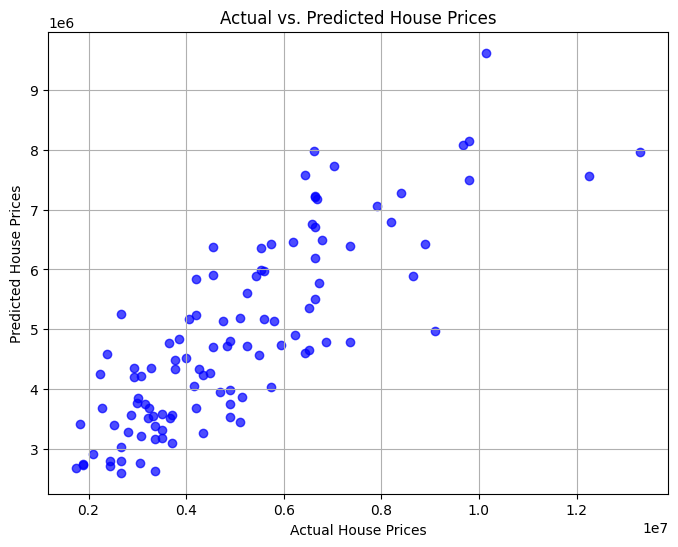

In [14]:
# Step 8: Visualization
# Visualize the actual vs. predicted house prices using a scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs. Predicted House Prices')
plt.grid(True)
plt.show()

# Step 9: Interpretation

In [15]:
# Print the coefficients (slopes) for each feature to understand their impact on the house price
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients (Slopes):")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef:.2f}")

print(f"Intercept: {intercept:.2f}")

Coefficients (Slopes):
area: 235.97
bedrooms: 76778.70
bathrooms: 1094444.79
stories: 407476.59
parking: 224841.91
mainroad_yes: 367919.95
guestroom_yes: 231610.04
basement_yes: 390251.18
hotwaterheating_yes: 684649.89
airconditioning_yes: 791426.74
prefarea_yes: 629890.57
furnishingstatus_semi-furnished: -126881.82
furnishingstatus_unfurnished: -413645.06
Intercept: 260032.36


Prediction Script to Predict the House Price on Custom Input 

In [35]:
input_data = pd.DataFrame({
    'area': [1500],
    'bedrooms': [3],
    'bathrooms': [2],
    'stories': [1],
    'parking': [2],
    'mainroad_yes': [1],
    'guestroom_yes': [0],
    'basement_yes': [1],
    'hotwaterheating_yes': [1],
    'airconditioning_yes': [0],
    'prefarea_yes': [1],
    'furnishingstatus_semi-furnished': [1],
    'furnishingstatus_unfurnished': [0]
})

# Predict the price
predicted_price = model.predict(input_data)[0]
predicted_price

5836201.419989709

In [36]:
#create the fucntion for it

In [37]:
# Function to predict house price
def predict_price(area, bedrooms, bathrooms, stories, parking, mainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea, furnishingstatus):
    # Create a DataFrame with the input values
    input_data = pd.DataFrame({
        'area': [area],
        'bedrooms': [bedrooms],
        'bathrooms': [bathrooms],
        'stories': [stories],
        'parking': [parking],
        'mainroad_yes': [1 if mainroad else 0],
        'guestroom_yes': [1 if guestroom else 0],
        'basement_yes': [1 if basement else 0],
        'hotwaterheating_yes': [1 if hotwaterheating else 0],
        'airconditioning_yes': [1 if airconditioning else 0],
        'prefarea_yes': [1 if prefarea else 0],
        'furnishingstatus_semi-furnished': [1 if furnishingstatus == 'semi-furnished' else 0],
        'furnishingstatus_unfurnished': [1 if furnishingstatus == 'unfurnished' else 0]
    })
    # Predict the price
    predicted_price = model.predict(input_data)[0]
    return predicted_price



In [38]:
# Example usage of the prediction function
area = 1500
bedrooms = 3
bathrooms = 2
stories = 2
parking = 2
mainroad = True
guestroom = False
basement = True
hotwaterheating = True
airconditioning = False
prefarea = True
furnishingstatus = 'semi-furnished'

predicted_price = predict_price(area, bedrooms, bathrooms, stories, parking, mainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea, furnishingstatus)
print(f"Predicted Price: {predicted_price:.2f}")

Predicted Price: 6243678.01


Saving Trained Model

In [39]:
import joblib
joblib.dump(model, 'linear_regression_model.pkl')


['linear_regression_model.pkl']

In [41]:
# Loading the model and predicting the house price
housing_model = joblib.load('linear_regression_model.pkl')
input_data = pd.DataFrame({
    'area': [1500],
    'bedrooms': [3],
    'bathrooms': [2],
    'stories': [1],
    'parking': [2],
    'mainroad_yes': [1],
    'guestroom_yes': [0],
    'basement_yes': [1],
    'hotwaterheating_yes': [1],
    'airconditioning_yes': [0],
    'prefarea_yes': [1],
    'furnishingstatus_semi-furnished': [1],
    'furnishingstatus_unfurnished': [0]
})

# Predict the price
predicted_price = housing_model.predict(input_data)[0]
predicted_price

5836201.419989709